# Digital Image Processing Fundamentals

## 1. Intoduction Images are Numpy's arrays np.ndarray

[[0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]]


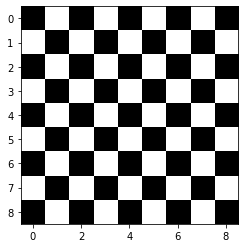

In [2]:
import numpy as np
check = np.zeros((9,9)) # 2d array
check[::2, 1::2] = 1 #체크 무늬 모양을 만들기 위한 check
check[1::2, ::2] = 1
print(check)
import matplotlib.pyplot as plt
 #gray색으로 채움
plt.imshow(check, cmap = "gray", interpolation = "nearest")
plt.show()

In [3]:
import skimage
from skimage import data #skimage안에 데이터가 있음 

camera =  data.camera()
camera.dtype 

dtype('uint8')

2^8의 graylevel을 나타냄 

이미지는 대부분 unsigned int 8을 많이 사용함

In [4]:
camera.shape

(512, 512)

shape가 한판 밖에 나오지 않을 것을 보아 RGB가 아니라 gray임을 알 수 있다. 

In [5]:
 type(camera)

numpy.ndarray

In [6]:
camera.min(), camera.max()

(0, 255)

## Image read & write

In [20]:
from skimage import io
io.imsave("my_camera.png", camera)
cam = io.imread('my_camera.png')

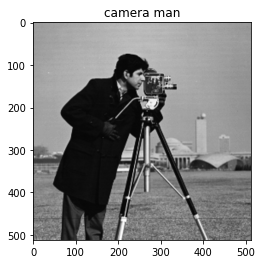

In [22]:
plt.imshow(cam, cmap = plt.cm.gray)
plt.title("camera man")
plt.show()

그림의 한 부분을 흰색으로 덮여줌

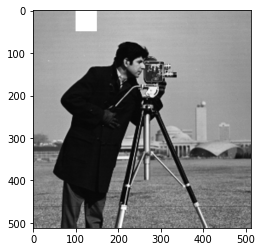

In [23]:
cam1 = cam.copy()
cam1[:50, 100:150] = 255
plt.imshow(cam1, cmap = plt.cm.gray)
plt.show()

그림의 방향을 바꾸어줌

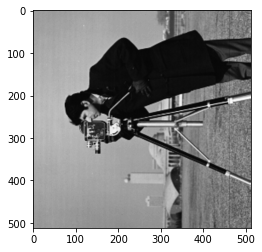

In [24]:
cam2 = cam.transpose()
plt.imshow(cam2, cmap = plt.cm.gray)
plt.show()

In [25]:
cam1[200,201] #픽셀의 값 알아내기

8

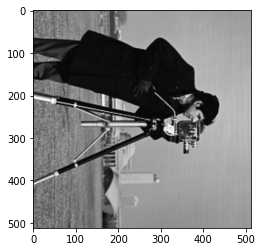

In [27]:
Nx = camera.shape[0]
Ny = camera.shape[1]
cam3 = np.zeros([512,512], dtype = 'uint8')
for i in range(Nx):
  for j in range(Ny):
    cam3[j, Ny-1-i] = cam[i, j]
plt.imshow(cam3, cmap = plt.cm.gray)
plt.show()

## Image color manipulation

In [28]:
cat = data.chelsea()
type(cat)

numpy.ndarray

In [29]:
cat.shape

(300, 451, 3)

칼라 이미지라는 것을 알 수 있다. 

In [30]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

B = 151, G = 129, R = 115

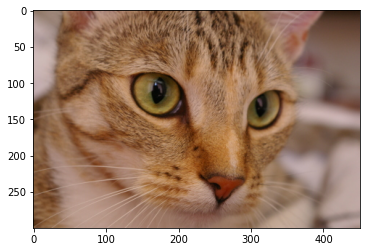

In [31]:
plt.imshow(cat)
plt.show()

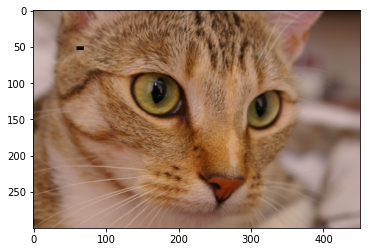

In [32]:
cat[50:55, 60:70] = 0 # 검게 칠한다. 
plt.imshow(cat)
plt.show()

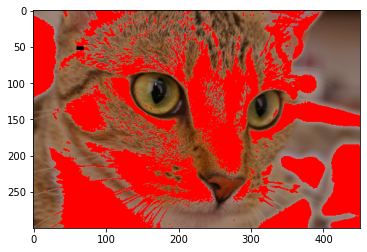

In [33]:
reddish = cat[:,:,0]>160 #R값이 160이 넘으면 
cat[reddish] = [255, 0, 0]
plt.imshow(cat)
plt.show()